In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for interactive plots
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# Set default plotting style
plt.style.use('seaborn-whitegrid')


In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/kaggle/input/caiso-renewable-energy-data-20212022/caiso_2021-22.csv')

# Show basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105104 entries, 0 to 105103
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   105104 non-null  int64  
 1   Date         105104 non-null  object 
 2   Time         105104 non-null  object 
 3   Solar        105092 non-null  float64
 4   Wind         105092 non-null  float64
 5   Geothermal   105092 non-null  float64
 6   Biomass      105092 non-null  float64
 7   Biogas       105092 non-null  float64
 8   Small hydro  105092 non-null  float64
 9   Coal         105092 non-null  float64
 10  Nuclear      105092 non-null  float64
 11  Natural Gas  105092 non-null  float64
 12  Large Hydro  105092 non-null  float64
 13  Batteries    105092 non-null  float64
 14  Imports      105092 non-null  float64
 15  Other        105092 non-null  float64
 16  DateTime     105104 non-null  object 
 17  Month        105104 non-null  int64  
 18  Year         105104 non-

,Unnamed: 0,Date,Time,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural Gas,Large Hydro,Batteries,Imports,Other,DateTime,Month,Year
0,0,2021-09-01,00:00,-34.0,4547.0,928.0,281.0,195.0,168.0,18.0,2263.0,8875.0,1261.0,-186.0,8145.0,0.0,2021-09-01 00:00:00,9,2021
1,1,2021-09-01,00:05,-34.0,4528.0,929.0,283.0,201.0,169.0,18.0,2262.0,9086.0,1109.0,-13.0,7717.0,0.0,2021-09-01 00:05:00,9,2021
2,2,2021-09-01,00:10,-34.0,4511.0,929.0,281.0,208.0,146.0,18.0,2263.0,9168.0,985.0,37.0,7553.0,0.0,2021-09-01 00:10:00,9,2021
3,3,2021-09-01,00:15,-34.0,4514.0,929.0,280.0,214.0,140.0,19.0,2262.0,9167.0,962.0,34.0,7458.0,0.0,2021-09-01 00:15:00,9,2021
4,4,2021-09-01,00:20,-34.0,4515.0,929.0,281.0,215.0,140.0,18.0,2262.0,9176.0,949.0,35.0,7342.0,0.0,2021-09-01 00:20:00,9,2021


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# Verify that the column is removed
print(df.columns)
print(df.head())

Index(['Date', 'Time', 'Solar', 'Wind', 'Geothermal', 'Biomass', 'Biogas',
       'Small hydro', 'Coal', 'Nuclear', 'Natural Gas', 'Large Hydro',
       'Batteries', 'Imports', 'Other', 'DateTime', 'Month', 'Year'],
      dtype='object')
         Date   Time  Solar    Wind  Geothermal  Biomass  Biogas  Small hydro  \
0  2021-09-01  00:00  -34.0  4547.0       928.0    281.0   195.0        168.0   
1  2021-09-01  00:05  -34.0  4528.0       929.0    283.0   201.0        169.0   
2  2021-09-01  00:10  -34.0  4511.0       929.0    281.0   208.0        146.0   
3  2021-09-01  00:15  -34.0  4514.0       929.0    280.0   214.0        140.0   
4  2021-09-01  00:20  -34.0  4515.0       929.0    281.0   215.0        140.0   

   Coal  Nuclear  Natural Gas  Large Hydro  Batteries  Imports  Other  \
0  18.0   2263.0       8875.0       1261.0     -186.0   8145.0    0.0   
1  18.0   2262.0       9086.0       1109.0      -13.0   7717.0    0.0   
2  18.0   2263.0       9168.0        985.0       37.0   

In [4]:
# Combine 'Date' and 'Time' columns into a single datetime column
df['CombinedDateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Set the combined datetime as the index
df.set_index('CombinedDateTime', inplace=True)

# Remove the original 'Date' and 'Time' columns if you no longer need them
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Sort the index
df = df.sort_index()

# Display the info and head to verify
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105104 entries, 2021-09-01 00:00:00 to 2022-08-31 23:55:00
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Solar        105092 non-null  float64
 1   Wind         105092 non-null  float64
 2   Geothermal   105092 non-null  float64
 3   Biomass      105092 non-null  float64
 4   Biogas       105092 non-null  float64
 5   Small hydro  105092 non-null  float64
 6   Coal         105092 non-null  float64
 7   Nuclear      105092 non-null  float64
 8   Natural Gas  105092 non-null  float64
 9   Large Hydro  105092 non-null  float64
 10  Batteries    105092 non-null  float64
 11  Imports      105092 non-null  float64
 12  Other        105092 non-null  float64
 13  DateTime     105104 non-null  object 
 14  Month        105104 non-null  int64  
 15  Year         105104 non-null  int64  
dtypes: float64(13), int64(2), object(1)
memory usage: 13.6+ MB


,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural Gas,Large Hydro,Batteries,Imports,Other,DateTime,Month,Year
CombinedDateTime,,,,,,,,,,,,,,,,
2021-09-01 00:00:00,-34.0,4547.0,928.0,281.0,195.0,168.0,18.0,2263.0,8875.0,1261.0,-186.0,8145.0,0.0,2021-09-01 00:00:00,9,2021
2021-09-01 00:05:00,-34.0,4528.0,929.0,283.0,201.0,169.0,18.0,2262.0,9086.0,1109.0,-13.0,7717.0,0.0,2021-09-01 00:05:00,9,2021
2021-09-01 00:10:00,-34.0,4511.0,929.0,281.0,208.0,146.0,18.0,2263.0,9168.0,985.0,37.0,7553.0,0.0,2021-09-01 00:10:00,9,2021
2021-09-01 00:15:00,-34.0,4514.0,929.0,280.0,214.0,140.0,19.0,2262.0,9167.0,962.0,34.0,7458.0,0.0,2021-09-01 00:15:00,9,2021
2021-09-01 00:20:00,-34.0,4515.0,929.0,281.0,215.0,140.0,18.0,2262.0,9176.0,949.0,35.0,7342.0,0.0,2021-09-01 00:20:00,9,2021


In [5]:
# Convert 'DateTime' column to pandas datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set 'DateTime' as index
df.set_index('DateTime', inplace=True)

# Sort just in case
df = df.sort_index()

# Display the info to check the index type
df.info()
print(df.index)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105104 entries, 2021-09-01 00:00:00 to 2022-08-31 23:55:00
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Solar        105092 non-null  float64
 1   Wind         105092 non-null  float64
 2   Geothermal   105092 non-null  float64
 3   Biomass      105092 non-null  float64
 4   Biogas       105092 non-null  float64
 5   Small hydro  105092 non-null  float64
 6   Coal         105092 non-null  float64
 7   Nuclear      105092 non-null  float64
 8   Natural Gas  105092 non-null  float64
 9   Large Hydro  105092 non-null  float64
 10  Batteries    105092 non-null  float64
 11  Imports      105092 non-null  float64
 12  Other        105092 non-null  float64
 13  Month        105104 non-null  int64  
 14  Year         105104 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 12.8 MB
DatetimeIndex(['2021-09-01 00:00:00', '2021-09-01 00:05:00',
           

In [6]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Check data types again
df.dtypes


Missing Values:
 Solar          12
Wind           12
Geothermal     12
Biomass        12
Biogas         12
Small hydro    12
Coal           12
Nuclear        12
Natural Gas    12
Large Hydro    12
Batteries      12
Imports        12
Other          12
Month           0
Year            0
dtype: int64


Solar          float64
Wind           float64
Geothermal     float64
Biomass        float64
Biogas         float64
Small hydro    float64
Coal           float64
Nuclear        float64
Natural Gas    float64
Large Hydro    float64
Batteries      float64
Imports        float64
Other          float64
Month            int64
Year             int64
dtype: object

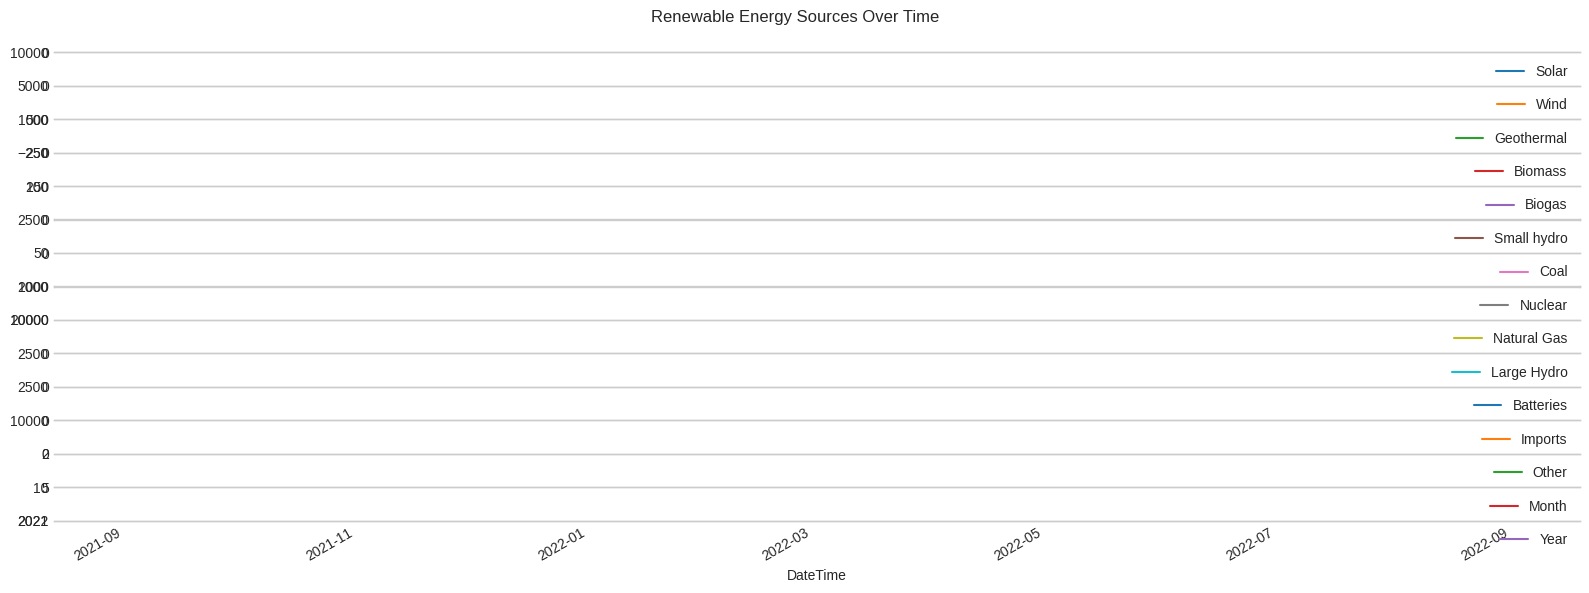

In [7]:
df.plot(figsize=(16, 6), subplots=True, title="Renewable Energy Sources Over Time")
plt.tight_layout()
plt.show()


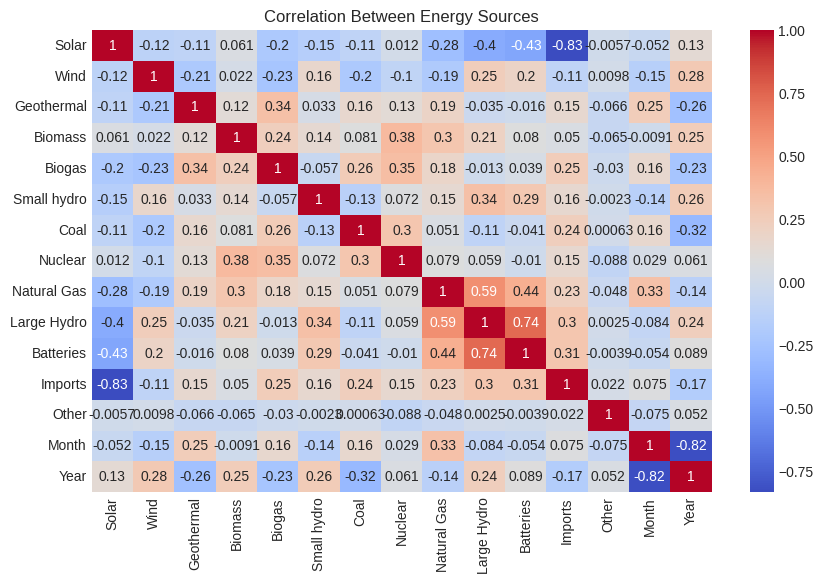

In [8]:
# Summary statistics
df.describe()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Energy Sources")
plt.show()
